In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data,columns =boston.feature_names)
df['Price'] = boston.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

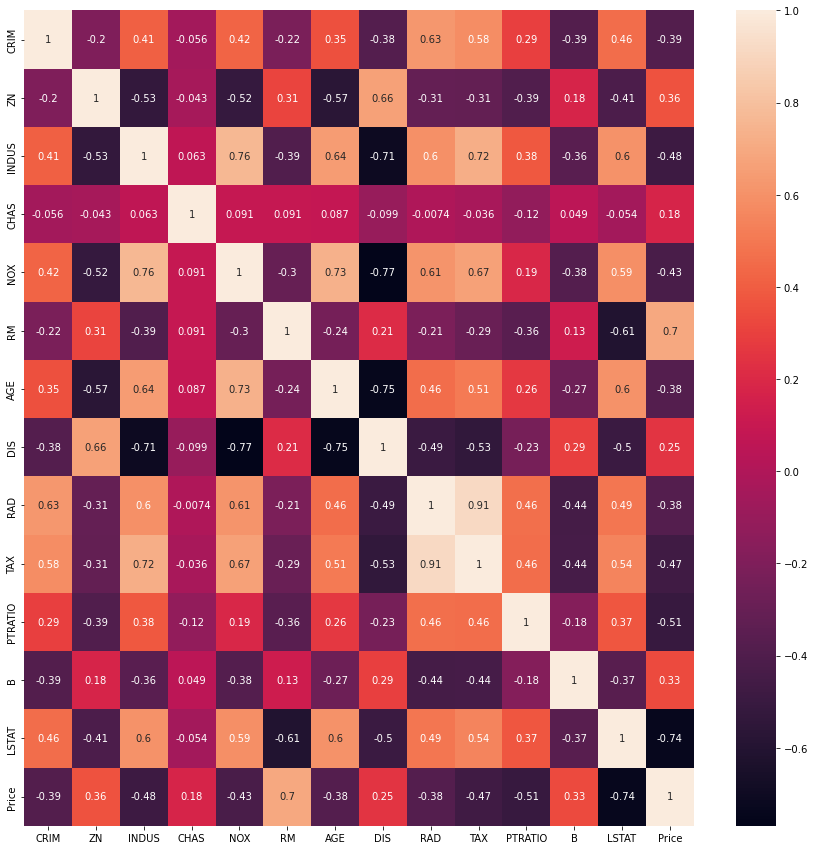

In [6]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [7]:
x = df.drop('Price',axis=1)
y = df['Price']

<AxesSubplot:>

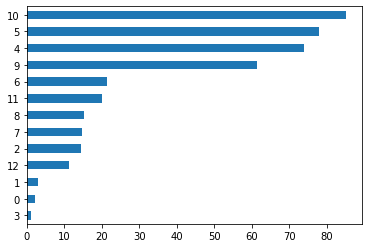

In [8]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list)
s1.sort_values().plot(kind ='barh')

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = True)
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred = lin_model.predict(x_test)

In [11]:
#Evaluation on Testing
mse = mean_squared_error(y_pred,y_test)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
r2 = r2_score(y_test,y_pred)
print(r2)

23.38083648027037
4.835373458200553
3.7507121808389177
0.7634174432138457


In [12]:
y_pred_train = lin_model.predict(x_train)

In [13]:
#Evaluation on Training
mse = mean_squared_error(y_pred_train,y_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_pred_train,y_train)
print(mae)
r2 = r2_score(y_pred_train,y_train)
print(r2)

21.86279471487961
4.675766751547773
3.196196807325742
0.6289321478794216


In [14]:
# Ridge Regression
ridge_model = Ridge(alpha=0.04)
ridge_model.fit(x,y)


Ridge(alpha=0.04)

In [15]:
# Evluation on Testing
y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_test,y_pred)
print(mae)
r2 =r2_score(y_test,y_pred)
print(r2)

20.969099922576508
4.579202978966592
3.597543917441503
0.7878209670824347


In [16]:
# Evluation on Training
y_pred_train = ridge_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 =r2_score(y_train,y_pred_train)
print(r2)

22.129327523694414
4.70418191864371
3.1858083068255643
0.7260590723040897


In [17]:
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [18]:
#Evaluation on Testing
y_pred = lasso_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
r2 = r2_score(y_test,y_pred)
print(r2)

23.33235896316197
4.830358057448947
3.735164584697135
0.763907970357895


In [19]:
#Evaluation on Training
y_pred_train = lasso_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)

21.899494548206345
4.679689578188531
3.179492758135989
0.7289041952954187


In [20]:
#GridSearch Cv and Randomized searchcv

In [21]:
ridge_model = Ridge()

params = {'alpha':np.arange(0.01,3,0.01)}

gscv_ridge_model = GridSearchCV(ridge_model,params)
gscv_ridge_model.fit(x_train,y_train)
gscv_ridge_model.best_estimator_

Ridge(alpha=0.04)

In [22]:
lasso_model = Lasso()

params = {'alpha':np.arange(0.01,3,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model,params)
gscv_lasso_model.fit(x_train,y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)